In [3]:
from BAO import *
from CSO import *
from graphics import *
from Shooting import *
from functions import *

create_folders()

### Метод оптимізації зграєю зозуль
Функція Растринга

In [4]:
cso1 = cso(rastrigin, pop_size=100, bounds=[[-5.12, 5.12]]*20, nests_count=150, pa=0.75, max_iter=500, stepSize=0.5)
cso1.execute()
print(min(cso1.values['fitness'][-1]))

fitness_trend('CSO_Rastrigin', cso1.values['fitness'])
best_iteration_values = [min(i) for i in cso1.values['fitness']]
distances('CSO_Rastrigin', best_iteration_values)

0.003026937673098473


Функція Мішри-Берда (з функціональними обмеженнями)

-99.76094649282359


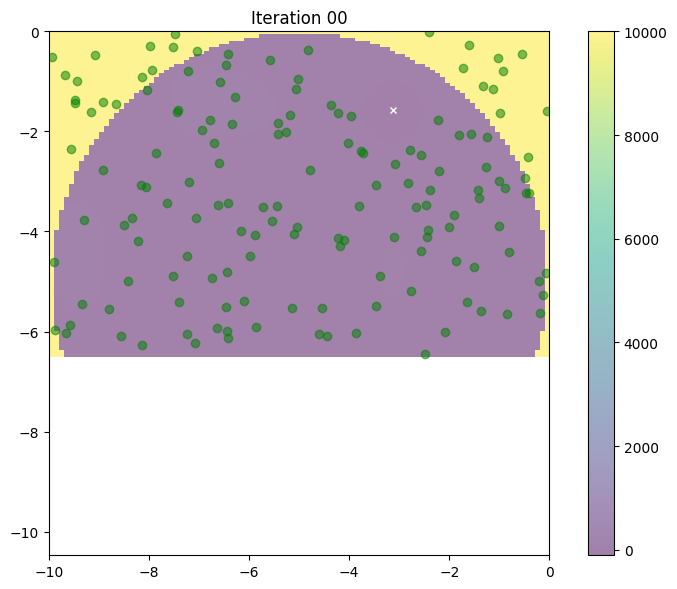

In [8]:
cso2 = cso(mishras_bird, pop_size=150, max_iter=500, bounds=[[-10, 0], [-6.5, 0]], nests_count=200, pa=0.75, stepSize=0.01)
cso2.execute()
print(min(cso2.values['fitness'][-1]))

fitness_trend('CSO_Mishras_bird', cso2.values['fitness'])
best_iteration_values = [min(i) for i in cso2.values['fitness']]
distances('CSO_Mishras_bird', best_iteration_values)

anim = Animation("Mishra's Bird function CSO", cso2.bounds, mishras_bird, cso2.values)
anim.animate()

### Оптимізація методом зграї кажанів
Функція Растринга

In [6]:
bao1 = bao(rastrigin, pop_size=200, bounds=[[-5.12, 5.12]]*20, A=0.7, r=0.7, Qmin=-2, Qmax=2, max_iter=500)
bao1.execute()
print(min(bao1.values['fitness'][-1]))

fitness_trend('BAO_Rastrigin', bao1.values['fitness'])
best_iteration_values = [min(i) for i in bao1.values['fitness']]
distances('BAO_Rastrigin', best_iteration_values)

134.9799576710808


Функція Мішри-Берда (з функціональними обмеженнями)

-106.4338975063681


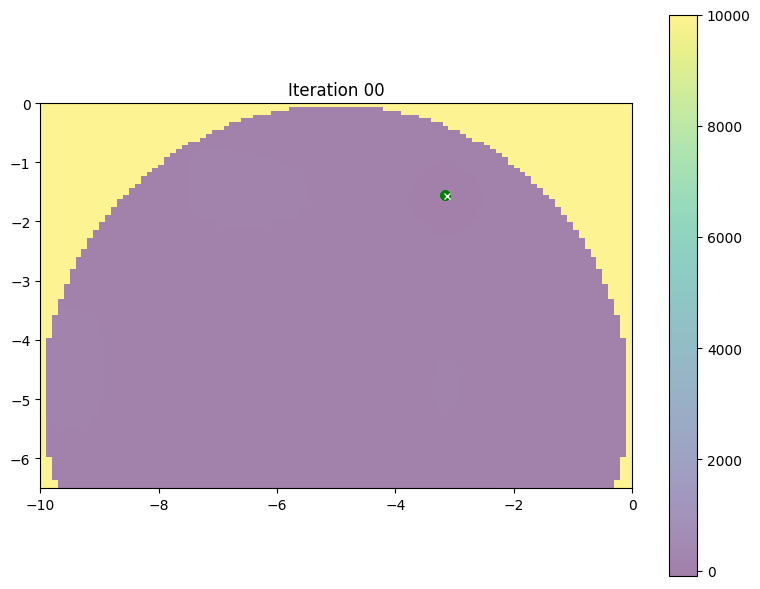

In [7]:
bao2 = bao(mishras_bird, pop_size=100, bounds=[[-10, 0], [-6.5, 0]], A=0.7, r=0.1, Qmin=-0.6, Qmax=0.6, max_iter=300)
bao2.execute()
print(min(bao2.values['fitness'][-1]))

fitness_trend('BAO_Mishras_bird', bao2.values['fitness'])
best_iteration_values = [min(i) for i in bao2.values['fitness']]
distances('BAO_Mishras_bird', best_iteration_values)

anim = Animation("Mishra's Bird function BAO", bao2.bounds, mishras_bird, bao2.values)
anim.animate()

### Метод стрільби

In [ ]:
shoot = shooting(filename='fun1', xa=1, xb=3, N=5001, T=1, lb=-5, ub=5)
shoot.X[2] = 3
shoot.Y[0] = 1
shoot.execute()

In [ ]:
shoot = shooting(filename='fun2', xa=1, xb=3, N=5001, T=2, lb=-1.8, ub=3)
shoot.X[0] = 1
shoot.Y[0] = 1
shoot.execute()